**Prática PSO - Computação Natural - 2020.3**

Ana Catarina Gomes da Fonseca Pereira

In [ ]:
import numpy as np

In [ ]:
#PARAMETROS

D = 30
INERCIA_INI = 0.8
PARTICULAS = 30
IT = 1000
COEF_COG = 2.05
COEF_SOC = 2.05
FUNCAO = 'rosenbrock'
# FUNCAO = 'rastrigin'

if FUNCAO == 'rosenbrock':
  limites = [-5, 10]
elif FUNCAO == 'rastrigin':
  limites = [-5.12, 5.12]

In [ ]:
# FUNCAO
import math
def valor_objetivo(particula):
  valor = 0
  for i in range(D):
    if FUNCAO == 'rosenbrock' and i < (D-1):
      valor += (100 * ((particula[i+1] - (particula[i]**2))**2) + ((particula[i] -1)**2))
    elif FUNCAO == 'rastrigin':
      valor += ((particula[i]**2) - 10 * math.cos(2*math.pi*particula[i]))
  if FUNCAO == 'rastrigin':
    valor += 10*D
  return valor

In [ ]:
#INICIALIZACAO
import random as rd
def inicializar_particula():
  particula = []
  for i in range(D):
    particula.append(rd.uniform(limites[0], limites[1]))
  return particula

def inicializar_pop():
  pop = []
  for i in range(PARTICULAS):
    pop.append(inicializar_particula())
  return pop

In [ ]:
def get_lista_fitness(pop):
  lista_fitness = []
  for i in range(PARTICULAS):
    lista_fitness.append(valor_objetivo(pop[i]))
  return lista_fitness

In [ ]:
def atualizar_posicao(pop, lider, p_best_pos, inercia, velocidade):
  nova_vel = []
  pop_aux = []
  for i in range(PARTICULAS):
    aux = []
    pop_aux_2 = []
    for j in range(D):
      v = inercia * velocidade[i][j]
      v += COEF_COG * rd.random() * (p_best_pos[i][j] - pop[i][j])
      v += COEF_SOC * rd.random() * (pop[lider[i]][j] - pop[i][j])  
      aux.append(v)
      aux_2 = pop[i][j] + v
      if aux_2 > limites[1]:
        aux_2 = limites[1]
      if aux_2 < limites[0]:
        aux_2 = limites[0]
      pop_aux_2.append(aux_2)
    pop_aux.append(pop_aux_2)
    nova_vel.append(aux)
  return pop_aux, nova_vel


In [ ]:
import matplotlib.pyplot as plt
 
def plotar(lista_melhores, topologia, inercia_final):
  x = []
  y = []
  for i in range(len(lista_melhores)):
    x.append(i)
    y.append(lista_melhores[i])
  plt.plot(x, y)
  plt.title('Topologia: ' + topologia +  ' Inércia Final: ' + str(inercia_final))
  plt.show()

In [ ]:
def atualizar_p_best(pop, lista_fitness, p_best_pos, p_best_fit):
  pbestfit = []
  pbestpos = []
  for i in range(PARTICULAS):
    if lista_fitness[i] < p_best_fit[i]:
      pbestfit.append(lista_fitness[i])
      pbestpos.append(pop[i])
    else:
      pbestfit.append(p_best_fit[i])
      pbestpos.append(p_best_pos[i])
  return pbestfit, pbestpos


In [ ]:
def get_lider(topologia, lista_fitness):
  if topologia == 'g_best':
    lista_lider = [np.argmin(lista_fitness)] * PARTICULAS #retorna indice do menor fitness
  if topologia == 'local':
    lista_lider = []
    for i in range(PARTICULAS):
      aux = -1
      if i ==  PARTICULAS-1:
        if lista_fitness[i] < lista_fitness[0]:
          aux = i
        else:
          aux = 0
        if lista_fitness[aux] > lista_fitness[i-1]:
          aux = i-1
      else:
        if lista_fitness[i] < lista_fitness[i-1]:
          aux = i
        else:
          aux = i - 1
        if lista_fitness[i+1] < lista_fitness[aux]:
          aux = i+1
      lista_lider.append(aux)
  if topologia == 'focal':
    foco = rd.randint(0, PARTICULAS -1)
    lista_lider = []
    for i in range(PARTICULAS):
      if lista_fitness[i] < lista_fitness[foco]:
        lista_lider.append(i)
      else:
        lista_lider.append(foco)
  return lista_lider

In [ ]:
import sys
import copy

def pso(topologia='local', inercia_final=0.8):
  #Inicializar população
  inercia = 0.8
  pop = inicializar_pop()

  #Encontrar Líder
  lista_fitness = get_lista_fitness(pop)

  #transformar em uma lista de indices
  lider = get_lider(topologia, lista_fitness)
  p_best_fit = [sys.maxsize] * PARTICULAS
  p_best_pos = copy.deepcopy(pop)
  velocidades = inicializar_pop()

  melhor = lista_fitness[np.argmin(lista_fitness)]
  lista_melhores = [] 
  for i in range(0, IT):
    pop, velocidades = atualizar_posicao(pop, lider, p_best_pos, inercia, velocidades)
    lista_fitness = get_lista_fitness(pop)

    p_best_fit, p_best_pos = atualizar_p_best(pop, lista_fitness, p_best_pos, p_best_fit)

    lider = get_lider(topologia, lista_fitness)
    if lista_fitness[np.argmin(lista_fitness)] < melhor:
      melhor = lista_fitness[np.argmin(lista_fitness)]
    lista_melhores.append(melhor)
    inercia -= (0.8 - inercia_final) / IT
  plotar(lista_melhores, topologia, inercia_final)
  return melhor

pso()

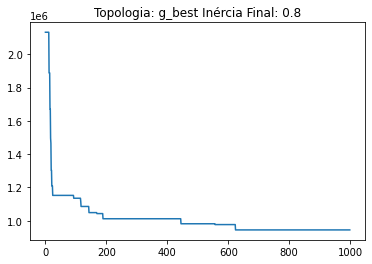

g_best   0.8  valor:  944695.4205207916


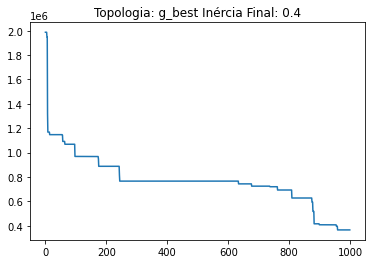

g_best   0.4  valor:  366372.42671336874


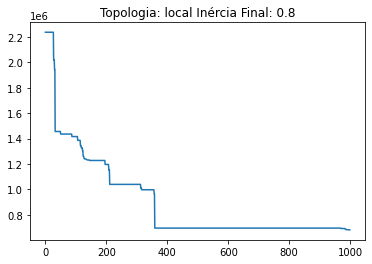

local   0.8  valor:  680398.6141115532


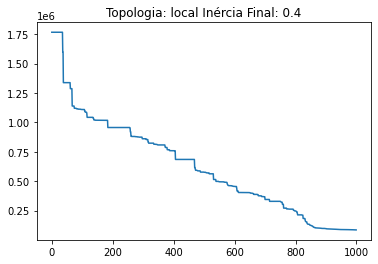

local   0.4  valor:  85325.88011386147


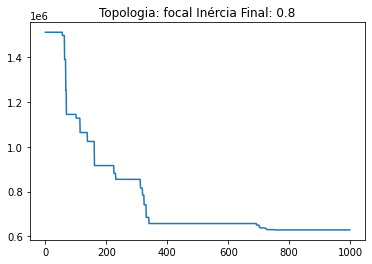

focal   0.8  valor:  628537.3653422218


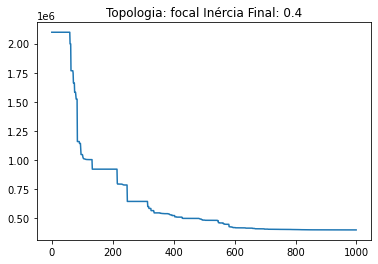

focal   0.4  valor:  397028.3378439015


In [ ]:
#rosenbrock
topologias = ['g_best', 'local', 'focal']
inercia_final = [0.8, 0.4]
for i in topologias:
  for j in inercia_final:
    valor = pso(topologia=i, inercia_final=j)
    print(i, ' ', j, ' valor: ', valor)

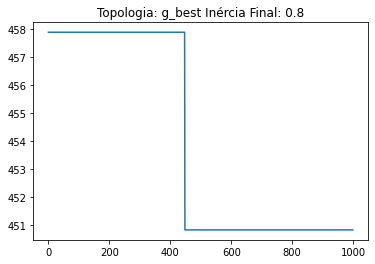

g_best   0.8  valor:  450.81611849856415


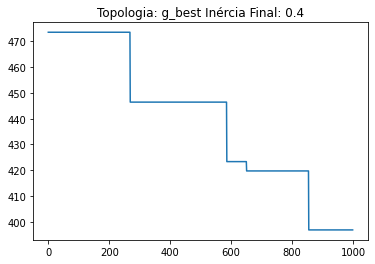

g_best   0.4  valor:  396.8156122472367


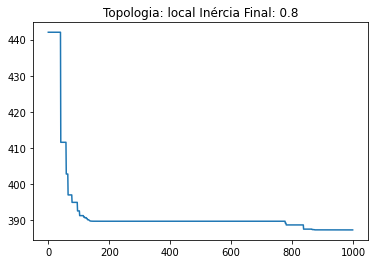

local   0.8  valor:  387.2598491703278


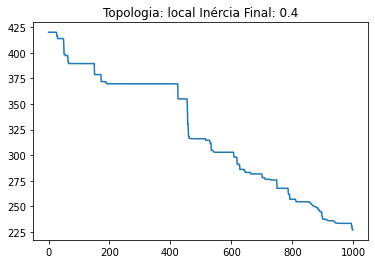

local   0.4  valor:  226.9797065695177


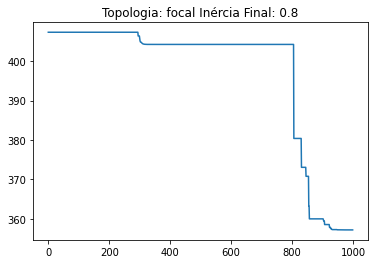

focal   0.8  valor:  357.14717952292517


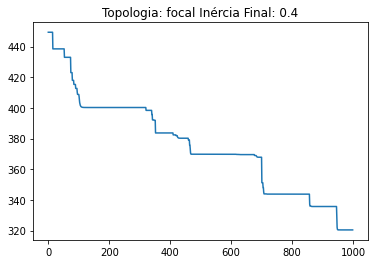

focal   0.4  valor:  320.4461534348804


In [ ]:
#rastrigin
topologias = ['g_best', 'local', 'focal']
inercia_final = [0.8, 0.4]
for i in topologias:
  for j in inercia_final:
    valor = pso(topologia=i, inercia_final=j)
    print(i, ' ', j, ' valor: ', valor)